Gaussian Naive Bayes Wine

In [379]:
import csv as csv
import pandas as pd
import numpy as np

train = pd.read_csv('wine-reviews\winemag-data_first150k.csv', header=0)

We are going to load the wine dataset. This dataset has wine data from 49 countrues with 2 attributes. We will be using the points and price of the wine to classift the country the wine is from.

In [380]:
print(train.shape)
train.head()

(150930, 11)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


We extract the columns that contain the country, points ,and price.

In [381]:
country=train.values[:,1]
points=train.values[:,4]
price=train.values[:,5]

x=np.array(train.values[:,4:6])
y=[]
for g in range (100):
    y.append(np.array(train.values[g,4:6]))
    

We are plotting he data for the top 3 countries to show that there is a lot of overlap among the datapoints.

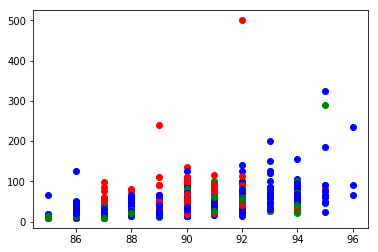

In [382]:
import matplotlib.pyplot as plt

for h in range(1000):
    #print(country[h])
    if country[h]==str("US"):
         plt.plot(points[h],price[h],'bo')
    if country[h]==str("Italy"):
         plt.plot(points[h],price[h],'ro')
    if country[h]==str("France"):
         plt.plot(points[h],price[h],'go')    
        
        

In [383]:
from collections import Counter
counts = Counter(country)
#print(counts)
common_country=[]
country_freq=[]
f=counts.most_common(49)
for j in range (49):
    common_country.append(f[j][0])
    country_freq.append(f[j][1])
    
print(common_country)
print(country_freq)    

['US', 'Italy', 'France', 'Spain', 'Chile', 'Argentina', 'Portugal', 'Australia', 'New Zealand', 'Austria', 'Germany', 'South Africa', 'Greece', 'Israel', 'Hungary', 'Canada', 'Romania', 'Slovenia', 'Uruguay', 'Croatia', 'Bulgaria', 'Moldova', 'Mexico', 'Turkey', 'Georgia', 'Lebanon', 'Cyprus', 'Brazil', 'Macedonia', 'Serbia', 'Morocco', 'England', 'Luxembourg', 'India', 'Lithuania', 'Czech Republic', nan, 'Ukraine', 'Switzerland', 'Bosnia and Herzegovina', 'South Korea', 'China', 'Slovakia', 'Egypt', 'Albania', 'Japan', 'Montenegro', 'Tunisia', 'US-France']
[62397, 23478, 21098, 8268, 5816, 5631, 5322, 4957, 3320, 3057, 2452, 2258, 884, 630, 231, 196, 139, 94, 92, 89, 77, 71, 63, 52, 43, 37, 31, 25, 16, 14, 12, 9, 9, 8, 8, 6, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1]


We are determining the most commong countries in our dataset and the frequency of how many times each country appears.

In [384]:
data=np.vstack((points,price))
print(data.shape)

(2, 150930)


Functions that are used to fold the data and to perform k-fold cross validation.

In [385]:
def folds(data,k,split): #split is what size split you want
    #n = np.zeros((k,split,data.shape[1]))
    n = []
    num1 = 0
    num2 = split
    for i in range(k-1):
        n.append(data[num1:num2])
        num1 = num2
        num2 = num2 + split
    n.append(data[num1:])
    return n

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

def cross_validation_winegaus(k, splitdata, splitlabels):
    z = np.zeros(k)
    final = [];
    for i in range(k):
        training_data = np.concatenate(np.delete(splitdata, i,0),axis=0)
        train_labels = np.concatenate(np.delete(splitlabels, i,0),axis=0)
        test_data = splitdata[i]
        test_labels = splitlabels[i]    
        model.fit(training_data.astype(float),train_labels.astype(float))
        predicted= model.predict(test_data.astype(float))
        acc = predicted-test_labels.astype(float)
        z[i]=np.count_nonzero(acc)/acc.size
        final = np.concatenate((final,predicted))
    return np.mean(z),final

In [386]:
all_country=np.zeros(150930)           
for m in range (150930):
    for n in range(49):    
        if country[m] == common_country[n]:
            #np.concatenate((new_country,np.array([l])),axis=0)
            #np.append(new_country,l)
            all_country[m]=n
            
for x in range(data.shape[1]):
    if math.isnan(data[0][x]):
                data[0][x]=0
    if math.isnan(data[1][x]):
                data[1][x]=0            

train_fold=folds(np.transpose(data),5,30186)
test_fold=folds(all_country,5,30186)
# for h in range(5):
#     print(train_fold[h].shape)
#     print(test_fold[h].shape)
    
splitdata=np.asarray([train_fold[0],train_fold[1],train_fold[2],train_fold[3],train_fold[4]])  
splitlabels=np.asarray([test_fold[0],test_fold[1],test_fold[2],test_fold[3],test_fold[4]])

We have performed k-fold cross validation for classification iwth k=5. In this case, there were 4 folds used for testing and 1 fold used for testing. With this implementation each data sample was only used once for testing.


Here we will use the Sci-kit learn GuassianNB Bayes function. We will plug our training data into model.fit() function and we will make predictions using the model.predict() function. The way GaussianNB works is that it iterates through every possible class of the output and calculates the mean and the standard deviation of ech feature of the training data that corresponds to that class. The mean is given by the sum of the elements divided by the total number of elements in the training set. The standard deviation is is given by taking each data sample and subtracting the mean of that feature and taking the square of the result. This value is summed for all of the data samples for each feature and is then  divided by the number of training samples per feature. This gives us the variance. Finally we take the square root of the data to obtain the standard deviation.  

Once we have the mean and standard deviation for each feature in the training data we plug value of the test data into the Gaussian distribution equation in order to determine the probability that each test sample belongs to a class. 
\begin{equation*}
N(\mu,sigma^2) = \Bigg[ \frac{1}{(\sqrt {2 \pi*sigma^2})} \exp \; \bigg[ -\frac{1}{2} \bigg(\frac{\pmb x - \mu}{2*sigma^2} \bigg)^2 \bigg] \Bigg]
\end{equation*}

In the above equation the mu represents the mean and the sigma^2 represents the standard deviation. x represents the sample that we are testing. We will plug into this equation for each test sample to obtain the probability that it belongs to each class. The feature with the greatest probability will be the prediction for the data sample.
    

In [387]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


acc,l=cross_validation_winegaus(5,splitdata,splitlabels)
print("Accuracy:", acc)

Accuracy: 0.6156628900814947


The accuracy of the model is 0.616. This is relatively low since the amount of features in our data was relatively low as well. we only had 2 features in the data with numerical values that were usable. This made it difficult for our alogrithm to be successful. Also it may be possible for their to be little correlation between the data and the output value. 

In [388]:
sep_country_points=np.zeros(49)
sep_country_price=np.zeros(49)
#all_country_points=np.zeros((49,62397))
#all_country_price=np.zeros((49,62397))
import math

for t in range (120000):
    for l in range(49):    
        if country[t] == common_country[l]:
            sep_country_points[l]=sep_country_points[l] + points[t]
            #for k in range (62397):
               # if all_country_points[l][k] ==0:
               # all_country_points[l][k] = points[t]
               # break
                
            if math.isnan(price[t]):
                price[t]=0
               
            sep_country_price[l]=sep_country_price[l] + price[t]
          #  for k in range (62397): 
          #  if all_country_price[l][k] ==0:
          #      all_country_price[l][k] = price[t]
          #      break
            #print(price[t],type(price[t]))
    

sep_country_points=sep_country_points/country_freq
print(sep_country_points)

sep_country_price=sep_country_price/country_freq
print(sep_country_price)

[69.74998798 71.780092   73.49369608 69.75108853 64.58596974 67.27561712
 73.85174746 59.56344563 57.30331325 71.87602224 75.72593801 64.97962799
 65.54072398 76.68730159 63.98268398 74.88265306 64.52517986 88.23404255
 60.75       81.59550562 65.7012987  58.92957746 84.76190476 88.09615385
 77.79069767 74.48648649 61.22580645 79.88       58.875      87.71428571
 81.33333333 92.88888889 58.         87.625      84.25       85.83333333
  0.         84.6        45.         84.75       81.5        54.66666667
 56.33333333 83.66666667 88.         85.         82.          0.
  0.        ]
[26.9140183  24.35480024 26.16181629 20.84059023 14.9485901  16.66116143
 16.4485156  21.84890054 14.95813253 19.73110893 32.6276509  15.70416298
 16.55769231 26.77142857 32.37229437 28.53571429 10.07913669 24.18085106
 16.81521739 21.25842697  9.45454545 11.3943662  29.0952381  24.80769231
 17.46511628 21.2972973  11.41935484 19.4        10.5        24.28571429
 18.33333333 42.22222222 27.11111111 13.875  

In [389]:
std_country_points=np.zeros(49)
std_country_price=np.zeros(49)
for t in range (120000):
    for l in range(49):    
        if country[t] == common_country[l]:
            std_country_points[l]=std_country_points[l] + math.pow((points[t]-sep_country_points[l]),2)
            if math.isnan(price[t]):
                price[t]=0
               
            std_country_price[l]=std_country_price[l] + math.pow((points[t]-sep_country_price[l]),2)
            
std_country_points=np.sqrt(std_country_points/country_freq)          
std_country_price=np.sqrt(sep_country_price/country_freq)            

for r in range(49):
    if std_country_points[r] ==0:
        std_country_points[r]=1;
    if std_country_price[r] ==0:
        std_country_price[r]=1;
print(std_country_points)
print(std_country_price)

[16.42527393 15.22453163 14.32616666 15.34535308 19.05484877 16.84819764
 13.27768916 23.537484   24.63230442 15.84756047 12.26798208 19.31128483
 18.11355571 10.24453762 20.29045924 12.64748687 18.25276198  1.99694198
 20.40903066  5.36353221 17.70546843 22.10963581  2.82682325  1.5598276
  8.13197207 11.12345938 21.20257514  3.64321616 22.29689142  1.09730654
  7.28900745  1.2862041  23.68778401  3.4255474   0.4330127   0.68718427
  1.          1.0198039  31.81980515  2.04633819  0.5        22.31757321
 23.08839696  0.47140452  1.          1.          1.          1.
  1.        ]
[0.02076861 0.03220785 0.03521383 0.0502059  0.05069766 0.05439511
 0.05559374 0.06639041 0.06712274 0.0803393  0.115354   0.08339604
 0.13685913 0.20614153 0.37435251 0.38156307 0.2692801  0.50719138
 0.42752088 0.48873176 0.35040877 0.40060458 0.67958015 0.69070327
 0.63731114 0.7586848  0.60693186 0.88090862 0.81009259 1.31707778
 1.23603308 2.1659543  1.73561104 1.31695672 1.11803399 1.73205081
 1.      

Wine Classification Dataset 1 kNN

In [390]:
import pandas as pd
file = pd.read_csv("wine-reviews/winemag-data_first150k.csv")
import numpy as np
import math
from collections import Counter
import random

In [391]:
country = file.values[:,1]
score = file.values[:,4]
price = file.values[:,5]
variety = file.values[:,9]
totalinput = file.values[:,4:6]

The wine classification used only contains 2 features that can be used.  Because of this, there seems to be a lack of correlation between the features and classification.  The error seen by kNN is very high.  Also, the kNN implementation has a time complexity of atleast O(N^2).  Because of this, the algorithm cannot take advantage of all 150k+ datapoints.  The implementation of kNN for this is using 2000 datapoints for one iteration of knn and 1000 datapoints to find the best k.  Becuase of these reasons, we decided to use another wine dataset to classify as well.

In [392]:
test = totalinput[:500]
testans = country[:500]
training = totalinput[500:2000]
trainingans = country[500:2000]
g = knn(5,training,test,trainingans)
d = knnerror(g,testans)
print("Using k = 5 and 2000 total datapoints(1500 training, 500 test), the percent error is %",d*100,".")

Using k = 5 and 2000 total datapoints(1500 training, 500 test), the percent error is % 56.599999999999994 .


In [393]:
foldsinput = totalinput[:1000]
foldslabel = country[:1000]
j = folds(foldsinput,5,200)
t = folds(foldslabel,5,200)
a,b = bestk([1,5,10,20,50],5,j,t)
print("The best value of k using crossvalidation is",a,"and the error associated is %",b*100,".")

The best value of k using crossvalidation is 20 and the error associated is % 52.5 .


Wine Classification Dataset 2 kNN

In [394]:
import pandas as pd
file = pd.read_csv('wine.csv')
import numpy as np
import math
from collections import Counter
import random
from matplotlib import pyplot as plt

(13,)


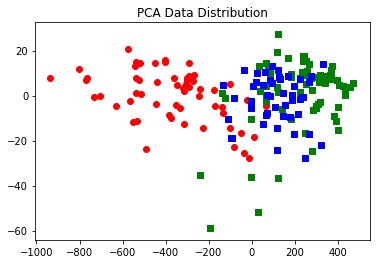

In [395]:
total = file.values
labels = file.values[:,0]
data = file.values[:,1:]
datat = data.T      #   -------PCA-------
mdata = datat.mean(axis = 1)  #Find mean
print(mdata.shape)
mdatam = np.tile(mdata.reshape(datat.shape[0],1),[1,datat.shape[1]]) #Make mean meatrix that spans dataset
center = datat - mdatam  #Center all the data by subtracting by mean
U, s, v = np.linalg.svd(center) #Find singular value components
Uusing = U[:,0:2] #Take top 2 eigenvectors
x = Uusing.T@center #apply eigenvectors to centered data
test = x[:,:40].T
testlabels = labels[:40]
traindata = x[:,40:].T
trainlabels = labels[40:]
plt.title("PCA Data Distribution")
plt.scatter(x.T[np.where(labels==1),0],x.T[np.where(labels==1),1],c='r',marker='o',label = '1')
plt.scatter(x.T[np.where(labels==2),0],x.T[np.where(labels==2),1],c='g',marker='s',label = '2')
plt.scatter(x.T[np.where(labels==3),0],x.T[np.where(labels==3),1],c='b',marker='s',label = '3')
plt.show()

Using PCA, we are able to visualize the data being used with minor data being loss. While the data isn't perfectly seperable, there seems to be a correlation between the dataset and the labels.  PCA is used because it allows us to reduce the dimensionality of the data.  Normally, we use this in order to speed up an algorithm we are using.  In this case, we can use it to visualize the relationship between data points.

In [396]:
def knn(k,train,test,trainanswer):
    dist = np.zeros((train.shape[0],))
    testans = np.zeros((test.shape[0],),dtype = object)
    for g in range(testans.shape[0]):
        for i in range(trainanswer.shape[0]):
            dist[i] = np.linalg.norm(train[i] - test[g])
        c = Counter(trainanswer[np.argsort(dist)][:k])
        testans[g] = c.most_common(1)[0][0]
    return testans

This is the generic knn algorithm being used for classification.  In order to classify using knn, you need to find the distance between your test point and each of the training data.  Then, find the k smallest distances' datapoints and their classification.  Finally, choose the most seen classification between the k datapoints.

In [397]:
def knnerror(testans,actualans):
    error = 0
    for i in range(testans.shape[0]):
        if (testans[i] != actualans[i]):
            error = error + 1;
    error = error/(testans.shape[0])
    return error

Knnerror is used to find the error between the generated test classifiers and the actual labels.  Every classification error increases the error value by one.  It returns the percent error found by dividing the toal error and the total datapoints.

In [398]:
def folds(data,k,split):
    n = []
    num1 = 0
    num2 = split
    for i in range(k-1):
        n.append(data[num1:num2])
        num1 = num2
        num2 = num2 + split
    n.append(data[num1:])
    return n

Folds is used to create folds that will be used in cross validation.  It takes in the data, how many folds you want, and the amount for each split.  If the splits do not divide evenly, the final split will contain an amount of data not equal to the split. 

In [399]:
def cross_validationknn(splitnum, splitdata, splitlabels,k):
    z = np.zeros(splitnum)
    final = [];
    for i in range(splitnum):
        training_data = np.concatenate(np.delete(splitdata, i,0),axis=0)
        train_labels = np.concatenate(np.delete(splitlabels, i,0),axis=0)
        test_data = splitdata[i]
        test_labels = splitlabels[i]
        y_tested = knn(k,training_data,test_data,train_labels)
        z[i] = knnerror(y_tested,test_labels)
        final = np.concatenate((final,y_tested))
    return np.mean(z),final

Cross validation is used to find the best value for k.  It uses the folds created by the folds function.  What the function does is perform knn multiple times where each fold becomes the test data once and the rest of the folds become the training data.  It computes the knnerror each time knn is run.  The output is the mean of all the error percentages and all the labels that the folds created.

In [400]:
def bestk(k,splitnum,splitdata,splitlabels):
    j = [];
    for i in range(len(k)):
        j.append((cross_validationknn(splitnum,splitdata,splitlabels,k[i]))[0])
    error = min(j)
    bestk = k[j.index(min(j))]
    return bestk,error  

Bestk is used in conjunction with crossvalidation.  Bestk runs crossvalidation with different values of k(k in kNN) and chooses the k value with the least error.  It returns the best k value and the error associated with it.

In [401]:
g = knn(5,traindata,test,trainlabels)
d = knnerror(g,testlabels)
print("kNN error using PCA is %",d*100,".")

kNN error using PCA is % 27.500000000000004 .


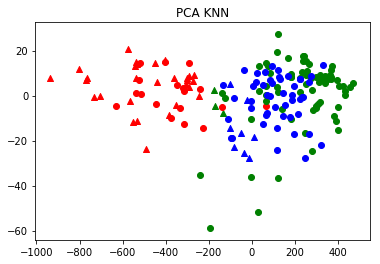

In [402]:
plt.scatter(test[np.where(g==1),0],test[np.where(g==1),1],c='r',marker='^')
plt.scatter(test[np.where(g==2),0],test[np.where(g==2),1],c='g',marker='^')
plt.scatter(test[np.where(g==3),0],test[np.where(g==3),1],c='b',marker='^')
plt.scatter(traindata[np.where(trainlabels==1),0],traindata[np.where(trainlabels==1),1],c='r',marker='o')
plt.scatter(traindata[np.where(trainlabels==2),0],traindata[np.where(trainlabels==2),1],c='g',marker='o')
plt.scatter(traindata[np.where(trainlabels==3),0],traindata[np.where(trainlabels==3),1],c='b',marker='o')
plt.title('PCA KNN')
plt.show()

In [403]:
j = folds(data,5,35)
t = folds(labels,5,35)
a,b = bestk([1,5,10,20,50],5,j,t)
print("The best value of k using crossvalidation is ",a,"and the error associated is %",b*100,".")

The best value of k using crossvalidation is  1 and the error associated is % 34.53281853281853 .


We ended up switching to a different wine dataset, as the first dataset (from kaggle), only had two features that were numerical and easily used for classification. This proved to be insufficient. So, we switched to a new dataset.



Wine SVM

In [404]:
#imports
import numpy as np
from sklearn import svm, metrics, linear_model
import matplotlib.pyplot as plt
import pandas as pd

In [405]:
#This section is to show how only two features is insufficient at classifying wines by their country of origin
'''
wine = np.array(pd.read_csv('wine123.csv', header=None))
#Get countries in wine
count = 0
countries = {}
for i in range(len(wine)):
    if wine[i,1] not in countries:
        countries[wine[i,1]] = count
        count +=  1
        
for i in range(len(wine)):
    wine[i,1] = countries[wine[i,1]]

wine_countries = wine[:,1]
wine_features = np.vstack((wine[1::,4], wine[1::,5]))
wine_features[1,0] = 0

for i in range(len(wine_features)):
    for j in range(len(wine_features[0])):
        try:
            wine_features[i,j] = float(wine_features[i,j])
        except:
            wine_features[i,j] = 0
print(wine_countries.shape)
print(wine_features)
wine_svm = svm.LinearSVC(penalty='l2', loss='hinge', max_iter = 20000, tol=0.001, multi_class='ovr')

wine_svm.fit(wine_features.transpose(), wine_countries)
print(wine_svm.score(wine_features.transpose(), wine_countries))
'''

"\nwine = np.array(pd.read_csv('wine123.csv', header=None))\n#Get countries in wine\ncount = 0\ncountries = {}\nfor i in range(len(wine)):\n    if wine[i,1] not in countries:\n        countries[wine[i,1]] = count\n        count +=  1\n        \nfor i in range(len(wine)):\n    wine[i,1] = countries[wine[i,1]]\n\nwine_countries = wine[:,1]\nwine_features = np.vstack((wine[1::,4], wine[1::,5]))\nwine_features[1,0] = 0\n\nfor i in range(len(wine_features)):\n    for j in range(len(wine_features[0])):\n        try:\n            wine_features[i,j] = float(wine_features[i,j])\n        except:\n            wine_features[i,j] = 0\nprint(wine_countries.shape)\nprint(wine_features)\nwine_svm = svm.LinearSVC(penalty='l2', loss='hinge', max_iter = 20000, tol=0.001, multi_class='ovr')\n\nwine_svm.fit(wine_features.transpose(), wine_countries)\nprint(wine_svm.score(wine_features.transpose(), wine_countries))\n"

In [406]:
#Load new dataset
wine = np.array(pd.read_csv('Wine.csv', header=None))
wine_labels = wine[:,0]
wine_features = wine[:,1::].transpose()

In [407]:
#Since we had more success with one vs. Rest classification, that's the approach we will be taking here
#Create class labels
classone_labels = [1 if x == 1 else 0 for x in wine_labels]

classtwo_labels = [1 if x == 2 else 0 for x in wine_labels]

classthree_labels = [1 if x == 3 else 0 for x in wine_labels]

class_labels = [classone_labels, classtwo_labels, classthree_labels]

#Normalize data
print(wine_features.shape)
print(len(class_labels[0]))
for i in range(len(wine_features)):
    feature = wine_features[i]
    length = len(feature)
    mean = np.mean(feature)
    stdev = np.std(feature)
    wine_features[i] = (feature - [mean]*length)/stdev    
#Train SVMs
wine_svms = []

for i in range(0,3):
    _svm = svm.LinearSVC(penalty='l2', loss='hinge', max_iter = 20000, tol=0.001, verbose=1)
    _svm.fit(wine_features.transpose(), class_labels[i])
    wine_svms.append(_svm)

(13, 178)
178
[LibLinear][LibLinear][LibLinear]

In [408]:
#Classification. We'll be reusing the prediction function we defined earlier
OVA_wine_predictions = []
for i in range(len(wine_features[0])):
    wine = wine_features[:,i]
    prediction = getPrediction(wine.reshape(1,len(wine)), wine_svms, [1,2,3])
    OVA_wine_predictions.append(prediction)

#Calculate accuracy based on # of correct classifications
correct = 0
for i in range(len(OVA_wine_predictions)):
    if OVA_wine_predictions[i] == wine_labels[i]:
        correct += 1
print("Accuracy: " + str(correct/len(OVA_wine_predictions)))

Accuracy: 1.0


In [409]:
#Load new dataset
wine = np.array(pd.read_csv('Wine.csv', header=None))
wine_labels = wine[:,0]
wine_features = wine[:,1::].transpose()

#This section is to show how only two features is insufficient at clasisfyinh wine
wine_svm = svm.LinearSVC(penalty='l2', loss='hinge', max_iter = 20000, tol=0.001, multi_class='ovr')

wine_svm.fit(wine_features.transpose(), wine_labels)
print(wine_svm.score(wine_features.transpose(), wine_labels))

0.9325842696629213


Flag Classification SVM

In [410]:
#load dataset
flags = np.array(pd.read_csv('flags.data', header=None))
#194 flags, 30 attributes

In [411]:
flag_names = flags.transpose()[0]
flag_features = flags.transpose()[1::]

#We need to do a little preprocessing. Not every feature is a number.
#Features 18 (mainhue), 29 (color in top left), and 30 (color in top right) are strings

color_map = {'red' : 1, 'green' : 2, 'blue' : 3, 'gold' : 4, 'white' : 5, 'black' : 6, 'orange' : 7, 'brown' : 8}
mainhue = flag_features[16]
col_toplef = flag_features[-2]
col_botrig = flag_features[-1]

mainhue_num = [color_map[mainhue[i]] for i in range(len(mainhue))]
ctl_num = [color_map[col_toplef[i]] for i in range(len(col_toplef))]
cbr_num = [color_map[col_botrig[i]] for i in range(len(col_botrig))]

In [412]:
#replace the appropriate features in the data matrix
flag_features[16] = mainhue_num
flag_features[-2] = ctl_num
flag_features[-1] = cbr_num

#Standardize the features

for i in range(len(flag_features)):
    feature = flag_features[i]
    length = len(feature)
    mean = np.mean(feature)
    stdev = np.std(feature)
    flag_features[i] = (feature - [mean]*length)/stdev

In [413]:
#We will build a one vs. all multiclass classifier utilizing SVMs as the binary classifier
#This requires the training of 193 SVM classifiers

#Generate list of training labels 
#We're going to create an array of zeros with a single 1 at the position of each target flag
#This is necessary since we're doing one vs all classification. The flag in question is 1, while everything else is a 0.
training_labels = []
for i in range(len(flag_names)):
    temp = np.zeros(len(flag_features[0]))
    temp[i] = 1
    training_labels.append(temp)

In [414]:
#Create 193 SVM classifiers
svms = []
for labels in training_labels:
    _svm = svm.LinearSVC(penalty='l2', loss='hinge', max_iter = 20000, tol=0.001)
    _svm.fit(flag_features.transpose(), labels)
    svms.append(_svm)

In [415]:
#The array of svms is our classifier
def getPrediction(X, svms, labels):
    confidences = []
    for _svm in svms:
        confidences.append(_svm.decision_function(X))
    return labels[confidences.index(max(confidences))]# max(confidences))

In [416]:
OVA_flag_predictions = []
for i in range(len(flag_features[0])):
    flag = flag_features[:,i]
    prediction = getPrediction(flag.reshape(1,len(flag)), svms, flag_names)
    OVA_flag_predictions.append(prediction)
    print("Predicted: " + prediction + "\tActual: " + flag_names[i])

Predicted: Afghanistan	Actual: Afghanistan
Predicted: Albania	Actual: Albania
Predicted: Algeria	Actual: Algeria
Predicted: American-Samoa	Actual: American-Samoa
Predicted: Andorra	Actual: Andorra
Predicted: Angola	Actual: Angola
Predicted: Anguilla	Actual: Anguilla
Predicted: Antigua-Barbuda	Actual: Antigua-Barbuda
Predicted: Marianas	Actual: Argentina
Predicted: Argentine	Actual: Argentine
Predicted: Australia	Actual: Australia
Predicted: Austria	Actual: Austria
Predicted: Bahamas	Actual: Bahamas
Predicted: Bahrain	Actual: Bahrain
Predicted: Bangladesh	Actual: Bangladesh
Predicted: Barbados	Actual: Barbados
Predicted: Belgium	Actual: Belgium
Predicted: Belize	Actual: Belize
Predicted: Benin	Actual: Benin
Predicted: Bermuda	Actual: Bermuda
Predicted: Bhutan	Actual: Bhutan
Predicted: Bolivia	Actual: Bolivia
Predicted: Botswana	Actual: Botswana
Predicted: Brazil	Actual: Brazil
Predicted: British-Virgin-Isles	Actual: British-Virgin-Isles
Predicted: Brunei	Actual: Brunei
Predicted: Bulgar

In [417]:
#Try new attempt, one vs one classification
#Train N(N-1)/2 binary classifiers
#Certain flags are very similar - this might have more success
#We are limited in the sense that each flag only has one sample. 
oneSVMs = []

blah = np.vstack((flag_features[:,0], flag_features[:,9]))

for i in range(len(flag_features[0])):
    svmlist = []
    for j in range(1, len(flag_features[0])):    
        _svm = svm.LinearSVC(penalty='l2', loss='hinge', max_iter = 20000, tol=0.001)
        _svm.fit(np.vstack((flag_features[:,i], flag_features[:,j])), [1,0])
        svmlist.append(_svm)
    oneSVMs.append(svmlist)

In [418]:
#Notes - each individual SVM takes less time to train. But, we have to train a lot more of them (18,741). 
def getOVOPrediction(oneSVMs, x, labels):
    predictions = []
    for svmlist in oneSVMs:
        predictionlist = []
        for _svm in svmlist:
            predictionlist.append(_svm.predict(x))
        predictions.append(predictionlist.count([1]))
    return labels[predictions.index(max(predictions))]

In [419]:
flag_predictions = []
for i in range(len(flag_features[0])):
    flag = flag_features[:,i].reshape(1,29)
    prediction = getOVOPrediction(oneSVMs, flag, flag_names)
    flag_predictions.append(prediction)
    print("Predicted: " + prediction + "\tActual: " + flag_names[i])

Predicted: Afghanistan	Actual: Afghanistan
Predicted: Albania	Actual: Albania
Predicted: Algeria	Actual: Algeria
Predicted: American-Samoa	Actual: American-Samoa
Predicted: Andorra	Actual: Andorra
Predicted: Angola	Actual: Angola
Predicted: Anguilla	Actual: Anguilla
Predicted: Antigua-Barbuda	Actual: Antigua-Barbuda
Predicted: Argentina	Actual: Argentina
Predicted: Argentine	Actual: Argentine
Predicted: Australia	Actual: Australia
Predicted: Austria	Actual: Austria
Predicted: Bahamas	Actual: Bahamas
Predicted: Bahrain	Actual: Bahrain
Predicted: Bangladesh	Actual: Bangladesh
Predicted: Barbados	Actual: Barbados
Predicted: Belgium	Actual: Belgium
Predicted: Belize	Actual: Belize
Predicted: Benin	Actual: Benin
Predicted: Bermuda	Actual: Bermuda
Predicted: Bhutan	Actual: Bhutan
Predicted: Bolivia	Actual: Bolivia
Predicted: Botswana	Actual: Botswana
Predicted: Argentine	Actual: Brazil
Predicted: British-Virgin-Isles	Actual: British-Virgin-Isles
Predicted: Brunei	Actual: Brunei
Predicted: Bu

In [420]:
def Accuracy(predictions, actual):
    #Based on 0-1 loss metric
    correct = 0
    for i in range(len(predictions)):
        if predictions[i] == actual[i]:
            correct += 1
    return round(correct/len(actual),3)

In [421]:
#One vs. All Accuracy
print(Accuracy(OVA_flag_predictions, flag_names))

#One vs. One Accuracy
print(Accuracy(flag_predictions, flag_names))

0.943
0.861


Analysis

We find that one vs. all classification actually had more success than one vs. one classification

Flags kNN

In [422]:
import pandas as pd
file2 = pd.read_csv("flag.data")
import numpy as np
import math
from collections import Counter
import random
from matplotlib import pyplot as plt

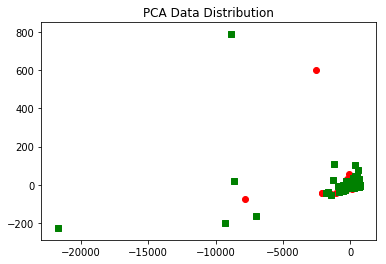

In [423]:
total = file2.values
labels = file2.values[:,10]
data = file2.values[:,1:10]
data = np.column_stack((data,file2.values[:,11:17]))
data = np.column_stack((data,file2.values[:,18:28]))
data = np.array(data,dtype=float)
datat = data.T      #------PCA Steps Seen in Second Wine--------
meandata = datat.mean(axis = 1)
meanmat = np.tile(meandata.reshape(datat.shape[0],1),[1,datat.shape[1]])
center = datat - meanmat
U, s, Vh = np.linalg.svd(center)
U2 = U[:,0:2]
x = U2.T@center
test = x[:,:40].T
testlabels = labels[:40]
traindata = x[:,40:].T
trainlabels = labels[40:]
plt.title("PCA Data Distribution")
plt.scatter(x.T[np.where(labels==0),0],x.T[np.where(labels==0),1],c='r',marker='o',label = '1')
plt.scatter(x.T[np.where(labels==1),0],x.T[np.where(labels==1),1],c='g',marker='s',label = '2')
plt.show()

Data shown on graph using PCA.  It uses a similiar process to Wine Classification Dataset 2.

In [424]:
g = knn(5,traindata,test,trainlabels)
d = knnerror(g,testlabels)
print("kNN error using PCA is %",d*100,".")

kNN error using PCA is % 20.0 .


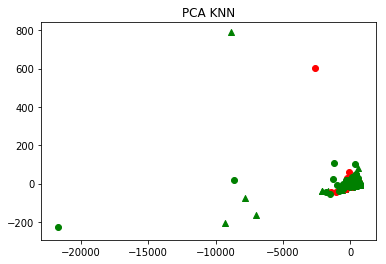

In [425]:
plt.scatter(test[np.where(g==0),0],test[np.where(g==0),1],c='r',marker='^')
plt.scatter(test[np.where(g==1),0],test[np.where(g==1),1],c='g',marker='^')
plt.scatter(traindata[np.where(trainlabels==0),0],traindata[np.where(trainlabels==0),1],c='r',marker='o')
plt.scatter(traindata[np.where(trainlabels==1),0],traindata[np.where(trainlabels==1),1],c='g',marker='o')
plt.title('PCA KNN')
plt.show()

In [426]:
j = folds(data,5,35)
t = folds(labels,5,35)
a,b = bestk([1,5,10,20,50],5,j,t)
print("The best value of k using crossvalidation is",a,"and the error associated is %",b*100,".")

The best value of k using crossvalidation is 20 and the error associated is % 21.09973045822102 .


Flag Gaussian Naive Bayes Classification

In [427]:
flag_data=[];
with open('flag.txt') as f:    
    for line in f:
        data = line.split()
        flag_data.append(data[0].split(","))  

We extract the column that contains a boolean value describing whether or not the color red is in the flag.

In [428]:
import numpy as np
land=[]
red=[]
for g in range (len(flag_data)):
    red.append(flag_data[g][10])
    land.append(flag_data[g][1])
red=np.asarray(red)
land=np.asarray(land)
print(red.shape)

(194,)


We extract the numerical values from the dataset and concatence the data together to perform classification.

In [429]:
data1=np.asarray([i[1:10] for i in flag_data])
data2=np.asarray([i[11:17] for i in flag_data])
data3=np.asarray([i[18:28] for i in flag_data])
data=np.hstack((data1,data2))
data=np.hstack((data,data3))

We have 194 data samples and 25 attributes for each data sample. This is relatively small amount of data samples, and could potientally lead to high classification error.

In [430]:
np.set_printoptions(threshold=np.nan)
print(data.shape)
#print(data)

(194, 25)


Here we will use the Sci-kit learn GuassianNB Bayes function. We will plug our training data into model.fit() function and we will make predictions using the model.predict() function. The way GaussianNB works is that it iterates through every possible class of the output and calculates the mean and the standard deviation of ech feature of the training data that corresponds to that class. The mean is given by the sum of the elements divided by the total number of elements in the training set. The standard deviation is is given by taking each data sample and subtracting the mean of that feature and taking the square of the result. This value is summed for all of the data samples for each feature and is then  divided by the number of training samples per feature. This gives us the variance. Finally we take the square root of the data to obtain the standard deviation.

In the above equation the mu represents the mean and the sigma^2 represents the standard deviation. x represents the sample that we are testing. We will plug into this equation for each test sample to obtain the probability that it belongs to each class. The feature with the greatest probability will be the prediction for the data sample.

In [431]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

train_fold=folds(data,5,39)
test_fold=folds(red,5,39)
# for h in range(5):
#     print(train_fold[h].shape)
#     print(test_fold[h].shape)
    
splitdata=np.asarray([train_fold[0],train_fold[1],train_fold[2],train_fold[3],train_fold[4]])  
splitlabels=np.asarray([test_fold[0],test_fold[1],test_fold[2],test_fold[3],test_fold[4]])  

def cross_validation(k, splitdata, splitlabels):
    z = np.zeros(k)
    final = [];
    for i in range(k):
        training_data = np.concatenate(np.delete(splitdata, i,0),axis=0)
        train_labels = np.concatenate(np.delete(splitlabels, i,0),axis=0)
        test_data = splitdata[i]
        test_labels = splitlabels[i]    
        model.fit(training_data.astype(float),train_labels.astype(float))
        predicted= model.predict(test_data.astype(float))
        acc = predicted-test_labels.astype(float)
        z[i]=np.count_nonzero(acc)/acc.size
        final = np.concatenate((final,predicted))
    return np.mean(z),final    
    
acc,l=cross_validation(5,splitdata,splitlabels)
print("Accuracy:", acc)

Accuracy: 0.4531713900134953


We have performed k-fold cross validation for classification iwth k=5. In this case, there were 4 folds used for testing and 1 fold used for testing. With this implementation each data sample was only used once for testing.
The accuracy of the model is 0.45. This is relatively low since the size of our data was relatively low as well. we only had 194 x 25 data samples altogether. This made it difficult for our alogrithm to be successful. Also it may be possible for their to be little correlation between the data and the output value. 


In order for the classification to improve, we may try to predict a different feature and determine if that has improved results. Also, we may want to obtain more data to improve our model.

Automobiles Dataset Lasso Regression

In [432]:
#Will Perform LASSO Regression in an attempt to predict the price of an automobile given its different attributes
#Load dataset
cars = np.array(pd.read_csv('cars.data', header=None))

In [433]:
#Data preprocessing
#Not all entries are numerical, such as make, fuel type, number of doors, body style, etc

#make
make = {'alfa-romero' : 0, 'audi' : 1, 'bmw' :  2, 'chevrolet' : 3, 'dodge' : 4, 'honda' : 5, 
'isuzu' : 6, 'jaguar' : 7, 'mazda' : 8, 'mercedes-benz' : 9, 'mercury' : 10, 
'mitsubishi' : 11, 'nissan' : 12, 'peugot' : 13, 'plymouth' : 14, 'porsche' : 15, 
'renault' : 16, 'saab' : 17, 'subaru' : 18, 'toyota' : 19, 'volkswagen' : 20, 'volvo' : 21}
#fuel type
fuel_type = {'diesel' : 0, 'gas' : 1}
#aspiration
aspiration = {'std' : 0, 'turbo' : 1}
#num doors
num_doors = {'four' : 0, 'two' : 1}
#body style 
body_style = {'hardtop' : 0, 'wagon' : 1, 'sedan' : 2, 'hatchback' : 3, 'convertible' : 4}
#drive-wheels
drive = {'4wd' : 0, 'fwd' : 1, 'rwd' : 2}
#engine-location
eng_loc = {'front': 0, 'rear': 1}


#engine type
eng_type = {'dohc' : 0, 'dohcv' : 1, 'l' : 2, 'ohc' : 3, 'ohcf' : 4, 'ohcv' : 5, 'rotor' : 6}
#num cylinders
num_cyl = {'eight' : 0, 'five' : 1, 'four' : 2, 'six' : 3, 'three' : 4, 'twelve' : 5, 'two' : 5}
#fuel system
fuel_sys = {'1bbl' : 0, '2bbl' : 1, '4bbl' : 2, 'idi' : 3, 'mfi' : 4, 'mpfi' : 5, 'spdi' : 6, 'spfi' : 6}

#For the attribute of normalized-losses, certain samples lack this attribute. In place of a number is a question sign
#For simplicity, I'll replace that question mark with 0.

In [434]:
#replace ?'s
for i in range(len(cars[:,0])):
    if cars[i,1] == '?': 
        cars[i,1] = 0
    else:
        cars[i,1] = int(cars[i,1])

#replace make
for i in range(len(cars[:,0])):
    cars[i,2] = make[cars[i,2]]

#replace fuel type
for i in range(len(cars[:,0])):
    cars[i,3] = fuel_type[cars[i,3]]
    
#replace aspiration
for i in range(len(cars[:,0])):
    cars[i,4] = aspiration[cars[i,4]]
    
#replace num_doors. There are some question marks here. By default I'll give it four doors
for i in range(len(cars[:,0])):
    if cars[i,5] == '?':
        cars[i,5] = 'four'
    cars[i,5] = num_doors[cars[i,5]]

#replace body style
for i in range(len(cars[:,0])):
    cars[i,6] = body_style[cars[i,6]]
    
#replace drive
for i in range(len(cars[:,0])):
    cars[i,7] = drive[cars[i,7]]
    
#replace engine location
for i in range(len(cars[:,0])):
    cars[i,8] = eng_loc[cars[i,8]]

#replace engine type
for i in range(len(cars[:,0])):
    cars[i,14] = eng_type[cars[i,14]]

#replace num cylinders    
for i in range(len(cars[:,0])):
    cars[i,15] = num_cyl[cars[i,15]]
    
#replace fuel system    
for i in range(len(cars[:,0])):
    cars[i,17] = fuel_sys[cars[i,17]]
    
#There are still ?s in the data. We'll iterate through the entire array and make them 0s for simplicity

for i in range(len(cars)):
    for j in range(len(cars[0])):
        if cars[i,j] == '?':
            cars[i,j] = 0
        else:
            cars[i,j] = float(cars[i,j])

Now we'll perform the task of LASSO regression. First, we need to calculate the regularization parameter, lamba (or alpha in the case of sklearn's LASSO regression tool).

In [435]:
#First, discretize lambda

lam = np.linspace(0.1, 10, 30)

#Then, using each lamba, perform k fold CV and pick the lambda that performed the best

In [436]:
#Implementation of k-fold cross validation for LASSO 

def kfoldRegression(k, x, y, l): #k = num folds, x = data, y = prices, l = lamda value 
    x_split = np.array_split(x, 5)
    y_split = np.array_split(y, 5)
    models = []

    for i in range(0,k):
        test = x_split[i]
        train_labels = np.hstack([y_split[j] for j in range(0,k) if j != i])
        temp = [x_split[j] for j in range(0,k) if j != i]
        train = np.vstack(temp)
        reg_model = linear_model.Lasso(alpha=l)
        reg_model.fit(train, train_labels)
        models.append(reg_model)    
    
    errors = []
    for model in models:
        predictions = model.predict(x)
        error = 0
        for i in range(len(predictions)):
            error += abs(predictions[i] - y[i])**2
        error /= len(predictions)
        errors.append(error)
        
    return np.mean(errors)

In [437]:
#shape data
prices = cars.transpose()[-1]
car_data = cars.transpose()[0:len(prices)].transpose()

#Determine optimal lambda
lambda_errors = []
for l in lam:
    lambda_errors.append(kfoldRegression(5, car_data, prices, l))

#This is our lambda (alpha) value
lambda_optimal = lam[lambda_errors.index(min(lambda_errors))]
print("optimal lambda value: " + str(lambda_optimal))

'''
reg_model = linear_model.Lasso(alpha=0.1)
reg_model.fit(car_data, prices)

price_predictions = reg_model.predict(car_data)

error = 0
for i in range(len(prices)):
    error += abs(prices[i] - price_predictions[i])
print(error)
'''

optimal lambda value: 0.1


'\nreg_model = linear_model.Lasso(alpha=0.1)\nreg_model.fit(car_data, prices)\n\nprice_predictions = reg_model.predict(car_data)\n\nerror = 0\nfor i in range(len(prices)):\n    error += abs(prices[i] - price_predictions[i])\nprint(error)\n'

In [438]:
#Now we can train the LASSO regression model
LASSO = linear_model.Lasso(alpha=lambda_optimal)
LASSO.fit(car_data, prices)
#Make predictions
predictions = LASSO.predict(car_data)

error: 3.3757696250487217e-12


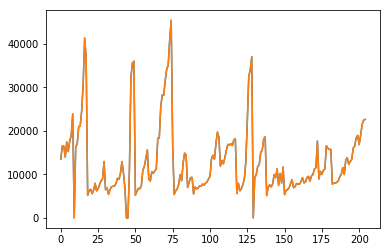

In [439]:
plt.plot(prices)
plt.plot(predictions)
error = 0
for i in range(len(prices)):
    error = abs(prices[i] - predictions[i])**2
error/=len(prices)

print("error: " + str(error))

Automobile Least Squares

In [440]:
import pandas as pd
file2 = pd.read_csv("imports-85.data")
import numpy as np
import math
from collections import Counter
import random
from matplotlib import pyplot as plt

In [441]:
total = file2.values
totalnew = [x for x in total if '?' not in x] #data has missing values called '?'. This gets rid of those values.
totalnew = np.asarray(totalnew)
prices = totalnew[:,-1]
data1 = totalnew[:,9:13]#data we are using 
data2 = totalnew[:,18:24]#data we are using
datatotal = np.column_stack((data1,data2))
datatotal = datatotal.astype(np.float)
prices = prices.astype(np.float)#values we are trying to predict

In [442]:
def folds(data,k,split): #split is what size split you want
    n = []
    num1 = 0
    num2 = split
    for i in range(k-1):
        n.append(data[num1:num2])
        num1 = num2
        num2 = num2 + split
    n.append(data[num1:])
    return n

In [443]:
o=folds(datatotal,5,31)
p=folds(prices,5,31)

In [444]:
def least_squares(x,y,test):
        wfull = np.linalg.inv(x.T@x)@x.T@y
        return test@wfull

The least squares regression finds the best w values in the equation y=wx +b. We can simplify this to y = wb since b can be appended to the w and x parameters. The solution we are using is  w=(xTx)−1xTyw=(xTx)−1xTy  which is implemented in least_squares.

In [445]:
def cross_validationleastsquares(k, splitdata, splitlabels,lam=None):
    z = np.zeros(k)
    final = [];
    for i in range(k):
        training_data = np.concatenate(np.delete(splitdata, i,0),axis=0)
        train_labels = np.concatenate(np.delete(splitlabels, i,0),axis=0)
        test_data = splitdata[i]
        test_labels = splitlabels[i]
        y_tested = least_squares(training_data.astype(float),train_labels.astype(float),test_data.astype(float))
        z[i] = error_rate(y_tested.astype(float),test_labels.astype(float))
        final = np.concatenate((final,y_tested))
    return np.mean(z),final

For cross validation leastsquares, each fold will act once as the test data and return a mean squared error. Then, it will return the mean error of all the calculated errors along with there computed values.


In [446]:
def error_rate(trained,actual):
    w = np.zeros(trained.shape[0])
    for i in range(trained.shape[0]):
        w[i] = (trained[i] - actual[i])**2
    return np.mean(w)

The error rate is mean square error rate.  This means the error is the squared difference between each data value and the actual value.  Then, we take the mean of all these values and return it.  This is useful as we won't have any negative value in our error and we want to measure the error in the distance between the points and actual value.

In [447]:
a,b = cross_validationleastsquares(5,o,p)

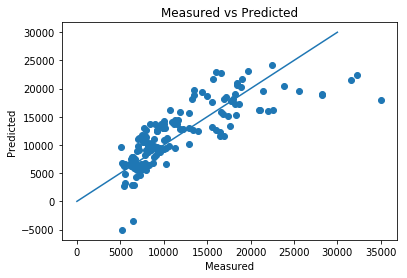

In [448]:
plt.scatter(prices, b)
plt.title("Measured vs Predicted")
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.plot(np.linspace(0,30000,50000),np.linspace(0,30000,50000))
plt.show()

The plot above measures Least Squared where the x axis are the true values and the y axis are the predicted values. The least squared algorithm is used to find the best fit line. The line represents y=x which represents accuracy of the classifier. The closer the line is to each datapoint, the better the accuracy of the classifier. In our dataset, the measured and predicted points do follow the trend of y=x but contains outliers.

In [449]:
print("The error for least squared is",a,"which is the mean squared error.  The number is relative to the values seen by the datapoints.")

The error for least squared is 13306252.378829142 which is the mean squared error.  The number is relative to the values seen by the datapoints.


Automobile Ridge Regression

In [450]:
def ridge_reg(x,y,test,lam):
    wfull = np.linalg.inv(x.T@x + lam*np.identity(x.shape[1]))@x.T@y
    return test@wfull

We are implementing ridge regression which uses lamda to imprive the result of least squares regression.

In [451]:
def cross_validation_ridge(k, splitdata, splitlabels,lam=None):
    z = np.zeros(k)
    final = [];
    for i in range(k):
        training_data = np.concatenate(np.delete(splitdata, i,0),axis=0)
        train_labels = np.concatenate(np.delete(splitlabels, i,0),axis=0)
        test_data = splitdata[i]
        test_labels = splitlabels[i]
        if(lam):
            y_tested = ridge_reg(training_data.astype(float),train_labels.astype(float),test_data.astype(float),lam)
        else:    
            y_tested = least_squares(training_data.astype(float),train_labels.astype(float),test_data.astype(float))
        z[i] = error_rate(y_tested.astype(float),test_labels.astype(float))
        final = np.concatenate((final,y_tested))
    return np.mean(z),final

Uses cross validation to determine the best lambda value.

In [452]:
def rrmain(k,splitdata,splitlabels,lam):
    newsplitdata = np.delete(splitdata, 0,0)
    newsplitlabels = np.delete(splitlabels, 0,0)
    errlam = np.zeros(lam.size)
    for i in range(lam.size):
        errlam[i] = (cross_validation_ridge(k-1,newsplitdata,newsplitlabels,lam[i]))[0]
    bestlam = lam[np.argmin(errlam)]
    print(bestlam)
    return cross_validation_ridge(k,splitdata,splitlabels,bestlam)

In [453]:
rrmain,rrtestans = rrmain(5,o,p,np.linspace(0,10,11))

10.0


The best lamda value is 10. This was determined by discretizing the values.

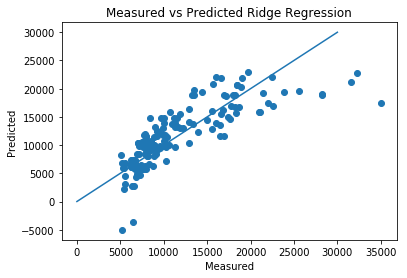

In [454]:
import matplotlib.pyplot as plt
plt.scatter(prices, rrtestans)
plt.title("Measured vs Predicted Ridge Regression")
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.plot(np.linspace(0,30000,50000),np.linspace(0,30000,50000))
plt.show()

The plotted data is close to the line x=y, so the ridge regression algorithm is properly functioning.